In [1]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))


TensorFlow version: 2.1.0
Keras version: 2.2.4-tf


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

In [5]:
df=pd.read_csv("E:\csv\BTC.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-26,10.7679,11.1808,10.5892,10.9740,10.9740,9425480
1,2016-03-27,10.9861,11.0542,10.1121,10.4192,10.4192,16744800
2,2016-03-28,10.4314,11.8613,10.4075,11.6656,11.6656,23188300
3,2016-03-29,11.7527,11.9136,11.3498,11.6564,11.6564,17684200
4,2016-03-30,11.6053,12.1785,11.4692,11.9529,11.9529,19351200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1823 non-null   object 
 1   Open       1823 non-null   float64
 2   High       1823 non-null   float64
 3   Low        1823 non-null   float64
 4   Close      1823 non-null   float64
 5   Adj Close  1823 non-null   float64
 6   Volume     1823 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 99.8+ KB


In [7]:
d1=df["Close"].values

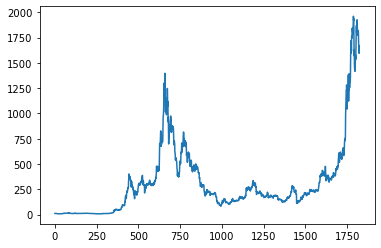

In [8]:
plt.plot(d1)
plt.show()

In [9]:
d1=d1.reshape([-1,1])
d1

array([[  10.974   ],
       [  10.4192  ],
       [  11.6656  ],
       ...,
       [1593.413452],
       [1595.359253],
       [1666.902222]])

In [10]:
# normalize the dataset
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(d1)
dataset[0:5]

array([[0.00212576],
       [0.00184173],
       [0.00247982],
       [0.00247511],
       [0.0026269 ]])

In [11]:
#split into test and train set
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]
len(train),len(test)

(1221, 602)

In [12]:
train,test

(array([[0.00212576],
        [0.00184173],
        [0.00247982],
        ...,
        [0.1026889 ],
        [0.10462314],
        [0.10466486]]),
 array([[0.10428323],
        [0.10844612],
        [0.10801317],
        [0.10804549],
        [0.11041003],
        [0.11050187],
        [0.1164124 ],
        [0.11221735],
        [0.11240695],
        [0.1096173 ],
        [0.10426599],
        [0.10234345],
        [0.10713489],
        [0.10467511],
        [0.1033548 ],
        [0.09204019],
        [0.09300998],
        [0.09144242],
        [0.09156918],
        [0.09607727],
        [0.10047916],
        [0.09713795],
        [0.09218553],
        [0.09445921],
        [0.09618615],
        [0.09443702],
        [0.09216032],
        [0.09322874],
        [0.09250551],
        [0.08552942],
        [0.08329058],
        [0.0829415 ],
        [0.08480237],
        [0.08437215],
        [0.08781135],
        [0.08840109],
        [0.086606  ],
        [0.08569691],
        [0.083515

In [13]:
#create array into dataset
def create_dataset(dataset,lookback=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-lookback):
        dataX.append(dataset[i:(i+lookback),0])
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX),np.array(dataY)    

In [14]:
#reshape into x=t,y=t+1
lookback=100
x_train,y_train=create_dataset(train,lookback)
x_test,y_test=create_dataset(test,lookback)
x_train.shape,y_train.shape

((1121, 100), (1121,))

In [15]:
# reshape input to be [samples, time steps, features]
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
#create and fit the LSTM network
model=Sequential()
model.add(LSTM(50,input_shape=(lookback,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=2)

Train on 1121 samples, validate on 502 samples
Epoch 1/100
1121/1121 - 19s - loss: 0.0119 - val_loss: 0.0051
Epoch 2/100
1121/1121 - 5s - loss: 0.0019 - val_loss: 0.0038
Epoch 3/100
1121/1121 - 4s - loss: 0.0011 - val_loss: 0.0020
Epoch 4/100
1121/1121 - 5s - loss: 7.5237e-04 - val_loss: 0.0021
Epoch 5/100
1121/1121 - 5s - loss: 7.3510e-04 - val_loss: 0.0016
Epoch 6/100
1121/1121 - 5s - loss: 6.4831e-04 - val_loss: 0.0014
Epoch 7/100
1121/1121 - 5s - loss: 6.4682e-04 - val_loss: 0.0014
Epoch 8/100
1121/1121 - 4s - loss: 6.0144e-04 - val_loss: 0.0013
Epoch 9/100
1121/1121 - 3s - loss: 5.7537e-04 - val_loss: 0.0012
Epoch 10/100
1121/1121 - 3s - loss: 5.7896e-04 - val_loss: 0.0013
Epoch 11/100
1121/1121 - 5s - loss: 5.2966e-04 - val_loss: 0.0016
Epoch 12/100
1121/1121 - 5s - loss: 5.2612e-04 - val_loss: 0.0017
Epoch 13/100
1121/1121 - 5s - loss: 5.2658e-04 - val_loss: 0.0021
Epoch 14/100
1121/1121 - 5s - loss: 4.9614e-04 - val_loss: 0.0015
Epoch 15/100
1121/1121 - 4s - loss: 4.9118e-04 - 

In [17]:
#make predictions
trainpredict=model.predict(x_train)
testpredict=model.predict(x_test)

In [18]:
#invert predictions
trainpredict=scaler.inverse_transform(trainpredict)
y_train=scaler.inverse_transform([y_train])
testpredict=scaler.inverse_transform(testpredict)
y_test=scaler.inverse_transform([y_test])

In [19]:
#calculate rmse
trainScore=math.sqrt(mean_squared_error(y_train[0],x_train[:,0]))
print("Train score : %.2f RMSE" %(trainScore))
testScore=math.sqrt(mean_squared_error(y_test[0],x_test[:,0]))
print("Test score : %.2f RMSE" %(testScore))

Train score : 374.30 RMSE
Test score : 702.54 RMSE


In [20]:
#shift train predictions for plotting
trainpredictplot=np.empty_like(dataset)
trainpredictplot[:,:]=np.nan
trainpredictplot.shape

(1823, 1)

In [21]:
trainpredictplot[lookback:len(trainpredict)+lookback,:]=trainpredict
trainpredictplot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [22]:
#shift train predictions for plotting
testpredictplot=np.empty_like(dataset)
testpredictplot[:,:]=np.nan
print(testpredictplot.shape)
testpredictplot[len(trainpredict)+(2*lookback):len(dataset),:]=testpredict
testpredictplot

(1823, 1)


array([[          nan],
       [          nan],
       [          nan],
       ...,
       [1671.31176758],
       [1588.27233887],
       [1533.26989746]])

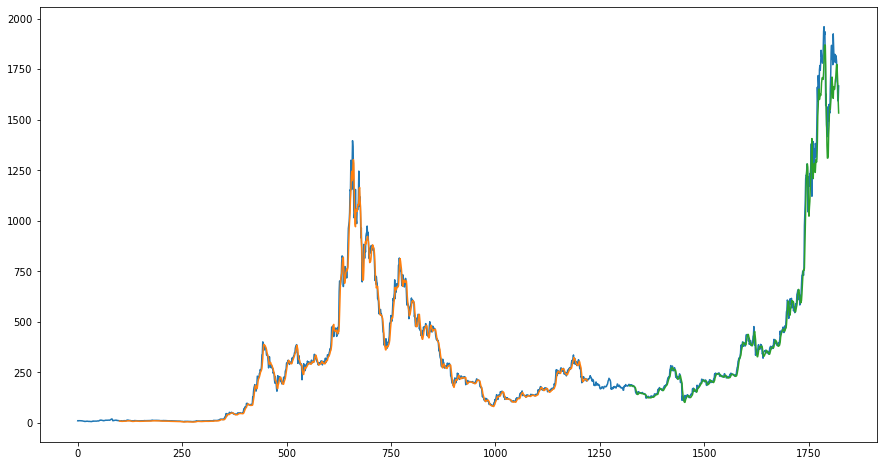

In [23]:
#plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [24]:
len(test)

602

In [37]:
x_input=test[502:].reshape(1,-1)
x_input.shape,x_input

((1, 100),
 array([[0.32561985, 0.33173398, 0.33403054, 0.32327611, 0.30869958,
         0.32151675, 0.2953362 , 0.30961561, 0.31719417, 0.32201928,
         0.34598154, 0.37042938, 0.37100419, 0.38129363, 0.37422086,
         0.37041413, 0.39302532, 0.49591186, 0.52904754, 0.55964793,
         0.61448012, 0.62398481, 0.62322664, 0.65234602, 0.64270584,
         0.55459981, 0.53068654, 0.57538161, 0.62028597, 0.59642001,
         0.62800842, 0.62628555, 0.64016294, 0.70160445, 0.70415298,
         0.57068789, 0.62953125, 0.6267045 , 0.70893213, 0.67453235,
         0.69124386, 0.63806786, 0.6610616 , 0.70428034, 0.70100014,
         0.66970545, 0.69737817, 0.77220025, 0.84679842, 0.81293502,
         0.87635868, 0.85546933, 0.82290003, 0.89067565, 0.90164055,
         0.8894606 , 0.90971027, 0.94029098, 0.92522823, 0.92060755,
         0.90765894, 0.90831243, 0.94281264, 0.98837092, 1.        ,
         0.97919939, 0.98742478, 0.90878619, 0.80036236, 0.82922145,
         0.75198364, 0.

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input[0:5]

[0.32561984968401364,
 0.3317339792427202,
 0.3340305352955818,
 0.32327611144470014,
 0.30869958288204186]

In [39]:
#demonstrate prediction for next 50 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<50):
    if len(temp_input)>100:
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,n_steps,1)
        print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)        

[0.7831141]
101
1 day input [0.33173398 0.33403054 0.32327611 0.30869958 0.32151675 0.2953362
 0.30961561 0.31719417 0.32201928 0.34598154 0.37042938 0.37100419
 0.38129363 0.37422086 0.37041413 0.39302532 0.49591186 0.52904754
 0.55964793 0.61448012 0.62398481 0.62322664 0.65234602 0.64270584
 0.55459981 0.53068654 0.57538161 0.62028597 0.59642001 0.62800842
 0.62628555 0.64016294 0.70160445 0.70415298 0.57068789 0.62953125
 0.6267045  0.70893213 0.67453235 0.69124386 0.63806786 0.6610616
 0.70428034 0.70100014 0.66970545 0.69737817 0.77220025 0.84679842
 0.81293502 0.87635868 0.85546933 0.82290003 0.89067565 0.90164055
 0.8894606  0.90971027 0.94029098 0.92522823 0.92060755 0.90765894
 0.90831243 0.94281264 0.98837092 1.         0.97919939 0.98742478
 0.90878619 0.80036236 0.82922145 0.75198364 0.73679427 0.74393047
 0.7214438  0.79754855 0.76063805 0.80325441 0.78587966 0.78145685
 0.84364078 0.87866393 0.93578348 0.95284189 0.91757796 0.9314151
 0.90372282 0.98183659 0.9459386  0.9

3 day output [[0.6802328]]
[0.32327611144470014, 0.30869958288204186, 0.3215167451877317, 0.2953362006209933, 0.3096156057599168, 0.3171941656835423, 0.32201928259778073, 0.34598154409772963, 0.37042937619866767, 0.3710041871368391, 0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.855

5 day output [[0.6065267]]
[0.3215167451877317, 0.2953362006209933, 0.3096156057599168, 0.3171941656835423, 0.32201928259778073, 0.34598154409772963, 0.37042937619866767, 0.3710041871368391, 0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.89067

7 day output [[0.5462652]]
[0.3096156057599168, 0.3171941656835423, 0.32201928259778073, 0.34598154409772963, 0.37042937619866767, 0.3710041871368391, 0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.88946

9 day output [[0.50878596]]
[0.32201928259778073, 0.34598154409772963, 0.37042937619866767, 0.3710041871368391, 0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402

11 day output [[0.49245852]]
[0.37042937619866767, 0.3710041871368391, 0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.920607

13 day output [[0.48726708]]
[0.38129363175098263, 0.37422085905045044, 0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124

15 day output [[0.48052803]]
[0.3704141279816667, 0.39302532117584144, 0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.988370923

17 day output [[0.46288577]]
[0.49591186138425186, 0.5290475357264868, 0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.98742

19 day output [[0.4322191]]
[0.5596479309816705, 0.6144801194901172, 0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623

21 day output [[0.3936792]]
[0.6239848079738433, 0.6232266426656267, 0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836

23 day output [[0.3560402]]
[0.6523460154889786, 0.6427058418489284, 0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304

25 day output [[0.32674932]]
[0.5545998071659847, 0.5306865401300832, 0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.797548

27 day output [[0.30876052]]
[0.5753816110757213, 0.6202859709029054, 0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254

29 day output [[0.30042803]]
[0.5964200114794476, 0.628008421060133, 0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568

31 day output [[0.29741165]]
[0.6262855506951164, 0.6401629383974056, 0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.878663

33 day output [[0.29501808]]
[0.7016044510786889, 0.7041529792460146, 0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.952841

35 day output [[0.2899384]]
[0.5706878853110465, 0.6295312507907117, 0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150

37 day output [[0.2809878]]
[0.6267045042242412, 0.7089321329096642, 0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365

39 day output [[0.26890916]]
[0.6745323498935583, 0.6912438581867492, 0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.913756

41 day output [[0.25554672]]
[0.6380678600024875, 0.6610616045193719, 0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.9137568197919308, 0.9215739466071844, 0.930009

43 day output [[0.24286887]]
[0.704280339869728, 0.7010001440427925, 0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.9137568197919308, 0.9215739466071844, 0.9300095044488945, 0.909227575625109, 0.9270273

45 day output [[0.232236]]
[0.6697054514182937, 0.6973781731390476, 0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.9137568197919308, 0.9215739466071844, 0.9300095044488945, 0.909227575625109, 0.9270273376725489, 0.9244729979302895, 0.91197258

47 day output [[0.22411256]]
[0.7722002545139106, 0.8467984228485285, 0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.9137568197919308, 0.9215739466071844, 0.9300095044488945, 0.909227575625109, 0.9270273376725489, 0.9244729979302895, 0.9119725813048204, 0.8623739955448226, 0.855880

49 day output [[0.21818691]]
[0.8129350171750546, 0.8763586839032251, 0.8554693295092775, 0.8229000292874811, 0.8906756472154598, 0.9016405476552383, 0.8894605954626604, 0.9097102716671436, 0.9402909811849314, 0.925228225710584, 0.9206075541868377, 0.9076589382745598, 0.9083124276575196, 0.9428126369615034, 0.9883709238827617, 1.0, 0.9791993857750957, 0.9874247793130314, 0.9087861872256253, 0.8003623587619182, 0.8292214485910075, 0.7519836370172618, 0.7367942709154376, 0.7439304743556999, 0.7214437979428536, 0.7975485484786574, 0.7606380458085773, 0.803254410802739, 0.7858796641993984, 0.7814568452664616, 0.8436407753827645, 0.8786639266019177, 0.9357834843492564, 0.9528418917549785, 0.9175779553959423, 0.9314150972250966, 0.9037228151929386, 0.9818365911424979, 0.9459386002859144, 0.9137568197919308, 0.9215739466071844, 0.9300095044488945, 0.909227575625109, 0.9270273376725489, 0.9244729979302895, 0.9119725813048204, 0.8623739955448226, 0.8558805957049631, 0.8122442819039063, 0.813240

In [45]:
len(lst_output)

50

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [57]:
len(dataset)

1823

In [58]:
df=dataset.tolist()
df.extend(lst_output)
len(df)

1873

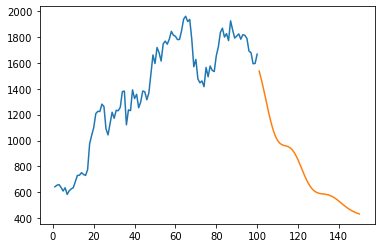

In [60]:
plt.plot(day_new,scaler.inverse_transform(dataset[1723:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

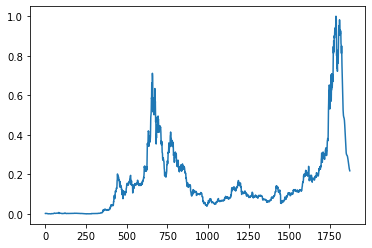

In [61]:
plt.plot(df)
plt.show()